##먼저 작업설정

In [1]:
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 69.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvision-0.20.1+cu121:
      Successfully uninstalled torchvision-0.20.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 1.13.0+cu116 which is incompatible.


In [2]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 5.4 MB/s eta 0:00:00


In [ ]:
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

In [1]:
## 세션다시시작
from mmdet.apis import init_detector, inference_detector
import mmcv

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


##파일 업로드

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

import os
import shutil

# Colab에 저장할 디렉토리 생성
os.makedirs('/content/rsna_data', exist_ok=True)


In [4]:
# 파일 업로드
from google.colab import files

uploaded = files.upload()

# 업로드된 파일을 /content/rsna_data로 이동
for filename in uploaded.keys():
    shutil.move(filename, f'/content/rsna_data/{filename}')
    print(f"Moved {filename} to /content/rsna_data")  ##drrive에놓고 복사하는거 수정필요.

Saving train_labels.csv to train_labels.csv
Moved train_labels.csv to /content/rsna_data


In [5]:
!pip install pydicom
import pydicom
import copy
import os.path as osp
import cv2

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.9 MB/s eta 0:00:00


In [6]:
# 집파일 복사해서 가져옴
import shutil
shutil.copy("/content/drive/MyDrive/Colab Notebooks/컴퓨터비전/stage_2_train_images.zip", "/content/rsna_data")


'/content/rsna_data/stage_2_train_images.zip'

In [7]:
#zip파일풀어서 "/content/rsna_data/total_images"에 놓음 dcm파일임
import zipfile
import os

os.makedirs("/content/rsna_data/total_images", exist_ok=True)
with zipfile.ZipFile("/content/rsna_data/stage_2_train_images.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/rsna_data/total_images")


In [8]:

#target==1인것들만 골라서 다른dcm은 삭제함 고르기.

import os
import pandas as pd

# 경로 설정
total_images_dir = "/content/rsna_data/total_images"
csv_file_path = "/content/rsna_data/train_labels.csv"

# CSV 파일 읽기
df = pd.read_csv(csv_file_path)

# Target == 1 인 patientId 목록 가져오기
target_1_ids = df[df["Target"] == 1]["patientId"].unique()
target_1_files = set(f"{pid}.dcm" for pid in target_1_ids)  # 파일 확장자 확인 필요(dcm/jpg)

# 디렉토리 내 파일 삭제
for file_name in os.listdir(total_images_dir):
    file_path = os.path.join(total_images_dir, file_name)
    if os.path.isfile(file_path):
        if file_name not in target_1_files:
            try:
                os.remove(file_path)
                print(f"Deleted file: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")
        else:
            print(f"Kept file: {file_path}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Deleted file: /content/rsna_data/total_images/93abb935-d49d-4cba-8c72-dcef00880aa6.dcm
Deleted file: /content/rsna_data/total_images/23011568-4563-4a06-96fe-9c29f08ff01c.dcm
Deleted file: /content/rsna_data/total_images/53f8837c-a657-4b82-af55-4e26117c7758.dcm
Deleted file: /content/rsna_data/total_images/e24cfd6b-66e8-49e0-b08e-b0879b5925f7.dcm
Deleted file: /content/rsna_data/total_images/ee9c1ee7-38c3-45f0-ac3b-5bdda1fc4223.dcm
Kept file: /content/rsna_data/total_images/8b216d4c-23b0-427e-aa94-d516d4ae9698.dcm
Deleted file: /content/rsna_data/total_images/8e25f085-5dfd-45ad-84c6-be1c2296189a.dcm
Deleted file: /content/rsna_data/total_images/7a1333ce-224c-4d2c-ad5b-da56ca50b47e.dcm
Deleted file: /content/rsna_data/total_images/6d44602a-e27d-4454-95fc-e1043d30a97d.dcm
Deleted file: /content/rsna_data/total_images/6448b83f-acd4-4ec5-94ca-fa76bd04a9cd.dcm
Deleted file: /content/rsna_data/total_images/5344ae10-10d7-4b35-b602-a97dbff359ef.dcm
Deleted fi

In [9]:
# "/content/rsna_data/total_images"에서  jpg로 바꿔주고 train, val, test에 넣는함수임
import os
import random
import pydicom
from PIL import Image

# 경로 설정
total_images_dir = "/content/rsna_data/total_images"
output_base_dir = "/content/rsna_data"
train_dir = os.path.join(output_base_dir, "train")
val_dir = os.path.join(output_base_dir, "val")
test_dir = os.path.join(output_base_dir, "test")

# 비율 설정 (예: 70% train, 15% val, 15% test)
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# 디렉토리 생성
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# DICOM -> JPG 변환 함수
def convert_dicom_to_jpg(dicom_path, jpg_path):
    try:
        # DICOM 파일 읽기
        dicom_data = pydicom.dcmread(dicom_path)
        pixel_array = dicom_data.pixel_array
        # 이미지 변환 및 저장
        image = Image.fromarray(pixel_array)
        image = image.convert("L")  # 흑백 이미지
        image.save(jpg_path)
    except Exception as e:
        print(f"Error converting {dicom_path} to JPG: {e}")

# 파일 목록 가져오기
all_files = [f for f in os.listdir(total_images_dir) if f.endswith(".dcm")]
random.shuffle(all_files)  # 랜덤 셔플

# 분할 인덱스 계산
total_files = len(all_files)
train_end = int(total_files * train_ratio)
val_end = train_end + int(total_files * val_ratio)

# 분할
train_files = all_files[:train_end]
val_files = all_files[train_end:val_end]
test_files = all_files[val_end:]

# 파일 이동 및 변환
for file_set, output_dir in zip([train_files, val_files, test_files], [train_dir, val_dir, test_dir]):
    for dicom_file in file_set:
        dicom_path = os.path.join(total_images_dir, dicom_file)
        jpg_file = os.path.splitext(dicom_file)[0] + ".jpg"
        jpg_path = os.path.join(output_dir, jpg_file)
        # DICOM -> JPG 변환
        convert_dicom_to_jpg(dicom_path, jpg_path)
        print(f"Converted {dicom_path} -> {jpg_path}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Converted /content/rsna_data/total_images/4b26d000-be82-4426-80f6-d129ff2e8c7c.dcm -> /content/rsna_data/train/4b26d000-be82-4426-80f6-d129ff2e8c7c.jpg
Converted /content/rsna_data/total_images/e7a937f4-f744-45b4-93df-f92786e4d6d6.dcm -> /content/rsna_data/train/e7a937f4-f744-45b4-93df-f92786e4d6d6.jpg
Converted /content/rsna_data/total_images/35d5dba1-22ee-4f68-b28f-bd16ae96ae00.dcm -> /content/rsna_data/train/35d5dba1-22ee-4f68-b28f-bd16ae96ae00.jpg
Converted /content/rsna_data/total_images/3482d22d-9a14-4b38-b28b-6f7b93a78e43.dcm -> /content/rsna_data/train/3482d22d-9a14-4b38-b28b-6f7b93a78e43.jpg
Converted /content/rsna_data/total_images/46e3db27-f943-4322-b7df-c960c6f0e915.dcm -> /content/rsna_data/train/46e3db27-f943-4322-b7df-c960c6f0e915.jpg
Converted /content/rsna_data/total_images/9efa04ab-254a-4047-8f2f-91e5fe93062f.dcm -> /content/rsna_data/train/9efa04ab-254a-4047-8f2f-91e5fe93062f.jpg
Converted /content/rsna_data/total_images/578e3b58-5

In [10]:
##########txt파일 생성하는 코드임

import os
import pandas as pd

# 경로 설정
base_dir = "/content/rsna_data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")
labels_file = os.path.join(base_dir, "train_labels.csv")

output_train_txt = os.path.join(base_dir, "train.txt")
output_val_txt = os.path.join(base_dir, "val.txt")
output_test_txt = os.path.join(base_dir, "test.txt")

# CSV 파일 읽기
labels_df = pd.read_csv(labels_file)

# xmin, ymin, xmax, ymax 계산
labels_df["xmax"] = labels_df["x"] + labels_df["width"]
labels_df["ymax"] = labels_df["y"] + labels_df["height"]

# Helper function: Generate TXT file
def generate_txt_file(image_dir, output_txt_path):
    with open(output_txt_path, "w") as f:
        for image_file in os.listdir(image_dir):
            if image_file.endswith(".jpg"):
                patient_id = os.path.splitext(image_file)[0]
                matching_rows = labels_df[labels_df["patientId"] == patient_id]
                for _, row in matching_rows.iterrows():
                    class_id = int(row["Target"])  # 클래스
                    xmin, ymin, xmax, ymax = map(int, [row["x"], row["y"], row["xmax"], row["ymax"]])
                    line = f"{image_file} {class_id} {xmin} {ymin} {xmax} {ymax}\n"
                    f.write(line)
                print(f"Processed: {image_file} -> {output_txt_path}")

# Train, Val, Test 각각 처리
generate_txt_file(train_dir, output_train_txt)
generate_txt_file(val_dir, output_val_txt)
generate_txt_file(test_dir, output_test_txt)

print("Train, Val, Test TXT 파일 생성 완료!")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Processed: a5e1f9e8-784c-415c-bded-f83e6130a111.jpg -> /content/rsna_data/train.txt
Processed: 06f5a38a-e4b1-4e5f-8c62-f48630a52504.jpg -> /content/rsna_data/train.txt
Processed: 0bcfe7ee-ada5-48de-990b-2a2fd6c6ed15.jpg -> /content/rsna_data/train.txt
Processed: 370e4257-86fb-40b7-a4df-b8a3a7b25226.jpg -> /content/rsna_data/train.txt
Processed: 8160b6e6-9cbf-4083-b849-991b1eaed067.jpg -> /content/rsna_data/train.txt
Processed: 7d93788d-2fb5-41f1-ba86-477681241879.jpg -> /content/rsna_data/train.txt
Processed: c2657014-120e-456e-97e5-1adcdb908b73.jpg -> /content/rsna_data/train.txt
Processed: 63450918-0bbe-43ac-9d0f-22bed387dfdb.jpg -> /content/rsna_data/train.txt
Processed: a4b7d67d-7e52-4b14-9897-4fa498b25d0a.jpg -> /content/rsna_data/train.txt
Processed: b13df066-d9eb-41d8-82c0-3fd56846a98f.jpg -> /content/rsna_data/train.txt
Processed: b34524bc-e812-4067-a0e8-bd7185bfb814.jpg -> /content/rsna_data/train.txt
Processed: bec77715-a15a-4725-9adc-792af

In [11]:
################ txt에서 ,jpg때는코드임
# 기존 train.txt 파일 경로
input_file = '/content/rsna_data/train.txt'

# 수정된 내용을 저장할 출력 파일 경로
output_file = '/content/rsna_data/train_modified.txt'

# 파일 열기
with open(input_file, 'r') as infile:
    lines = infile.readlines()

# .jpg 확장자 제거
modified_lines = [line.replace('.jpg', '') for line in lines]

# 수정된 내용을 새로운 파일에 저장
with open(output_file, 'w') as outfile:
    outfile.writelines(modified_lines)

print(f"수정된 파일이 {output_file}로 저장되었습니다.")


수정된 파일이 /content/rsna_data/train_modified.txt로 저장되었습니다.


In [12]:
# 기존  val, test 파일 경로
input_files = [ '/content/rsna_data/val.txt', '/content/rsna_data/test.txt']

# 수정된 내용을 저장할 출력 파일 경로
output_files = ['/content/rsna_data/val_modified.txt', '/content/rsna_data/test_modified.txt']

# 각 파일에 대해 .jpg 제거 처리
for input_file, output_file in zip(input_files, output_files):
    with open(input_file, 'r') as infile:
        lines = infile.readlines()

    # .jpg 확장자 제거
    modified_lines = [line.replace('.jpg', '') for line in lines]

    # 수정된 내용을 새로운 파일에 저장
    with open(output_file, 'w') as outfile:
        outfile.writelines(modified_lines)

    print(f"{input_file}에서 수정된 파일이 {output_file}로 저장되었습니다.")


/content/rsna_data/val.txt에서 수정된 파일이 /content/rsna_data/val_modified.txt로 저장되었습니다.
/content/rsna_data/test.txt에서 수정된 파일이 /content/rsna_data/test_modified.txt로 저장되었습니다.


## 환경설정

In [59]:
### 구조바꾸고 라벨이름바꾸는 실험0
import numpy as np
import pandas as pd
from PIL import Image
import mmcv
from mmdet.datasets.custom import CustomDataset
from mmdet.datasets.builder import DATASETS
@DATASETS.register_module(force=True)
class RSNA_Dataset(CustomDataset):
    CLASSES = ('Pneumonia',)  # 폐렴(Pneumonia)

    def load_annotations(self, ann_file):
        data_infos = []  # 포맷 중립 데이터를 담을 리스트
        image_list = mmcv.list_from_file(self.ann_file)  # 파일 이름들을 리스트로 묶은 것

        for image_id in image_list:
            # image_id에서 첫 번째 부분만 추출하여 .jpg 경로 수정
            image_id = image_id.split()[0]  # 공백 기준으로 분리 후 첫 번째 부분만 사용
            file_name = '{}/{}.jpg'.format(self.img_prefix, image_id)  # 공백 제거된 이미지 ID를 사용

            try:
                # 이미지 열기
                img = Image.open(file_name)
                width, height = img.size  # 실제 이미지 크기
                # 데이터 정보 딕셔너리 생성
                data_info = {
                    'filename': '{}.jpg'.format(image_id),  # 공백 제거한 파일명
                    'width': width,
                    'height': height
                }

                # CSV 파일에서 patientId에 해당하는 데이터를 가져옴
                df = pd.read_csv("/content/rsna_data/train_labels.csv")  # 필터링된 CSV 파일 경로
                patient_data = df[df['patientId'] == image_id]  # 해당 patientId에 해당하는 데이터 필터링
                if patient_data.empty:
                    continue  # 데이터가 없으면 스킵

                # Target == 1인 경우에만 바운딩 박스를 생성
                if patient_data['Target'].iloc[0] == 1:
                    gt_bboxes = []
                    gt_labels = []
                    gt_bboxes_ignore = []
                    gt_labels_ignore = []

                    for _, row in patient_data.iterrows():
                        # 바운딩 박스 생성
                        x1, y1 = row['x'], row['y']
                        x2, y2 = x1 + row['width'], y1 + row['height']

                        # 바운딩 박스를 리스트에 추가
                        gt_bboxes.append([x1, y1, x2, y2])
                        gt_labels.append([0])  # 레이블은 1로 설정 (폐렴)

                    # 데이터에 대한 annotation 정보를 딕셔너리로 저장
                    data_anno = {
                        'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                        'labels': np.array(gt_labels).reshape(-1,1),
                        'bboxes_ignore': np.array([0,0,0,0]).reshape(-1, 4),
                        'labels_ignore': np.array([4]).reshape(-1,1)
                    }

                    # 원하는 구조로 `ann` 키를 추가하여 리스트에 저장
                    data_infos.append({
                        'filename': data_info['filename'],
                        'width': data_info['width'],
                        'height': data_info['height'],
                        'ann': data_anno  # 어노테이션 정보를 'ann' 키에 담아서 저장
                    })


            except Exception as e:
                print(f"파일 {image_id}.jpg을 읽는 중 오류가 발생했습니다: {e}")

        return data_infos  # 최종적으로 포맷 중립 데이터 반환

In [82]:
import numpy as np
import pandas as pd
from PIL import Image
import mmcv
from mmdet.datasets.custom import CustomDataset
from mmdet.datasets.builder import DATASETS

@DATASETS.register_module(force=True)
class RSNA_Dataset(CustomDataset):
    CLASSES = ('Pneumonia',)  # 폐렴(Pneumonia)

    def load_annotations(self, ann_file):
        data_infos = []  # 포맷 중립 데이터를 담을 리스트
        image_list = mmcv.list_from_file(ann_file)  # 파일 이름들을 리스트로 묶은 것

        # CSV 파일 미리 로드
        try:
            df = pd.read_csv("/content/rsna_data/train_labels.csv")  # CSV 파일 경로
        except FileNotFoundError:
            raise FileNotFoundError("CSV 파일이 존재하지 않습니다. 경로를 확인하세요.")
        except Exception as e:
            raise RuntimeError(f"CSV 파일을 로드하는 중 오류가 발생했습니다: {e}")

        for image_id in image_list:
            # image_id에서 첫 번째 부분만 추출하여 .jpg 경로 수정
            image_id = image_id.split()[0]  # 공백 기준으로 분리 후 첫 번째 부분만 사용
            file_name = f'{self.img_prefix}/{image_id}.jpg'  # 이미지 경로

            try:
                # 이미지 열기
                img = Image.open(file_name)
                width, height = img.size  # 실제 이미지 크기

                # 해당 patientId에 대한 데이터 필터링
                patient_data = df[df['patientId'] == image_id]
                if patient_data.empty:
                    # 어노테이션이 없으면 스킵
                    data_infos.append({
                        'filename': f'{image_id}.jpg',
                        'width': width,
                        'height': height,
                        'ann': {
                            'bboxes': np.zeros((0, 4), dtype=np.float32),
                            'labels': np.zeros((0,), dtype=np.int64),
                            'bboxes_ignore': np.zeros((0, 4), dtype=np.float32),
                            'labels_ignore': np.zeros((0,), dtype=np.int64),
                        }
                    })
                    continue

                # Target == 1인 경우에만 바운딩 박스 생성
                gt_bboxes = []
                gt_labels = []

                for _, row in patient_data.iterrows():
                    if row['Target'] == 1:
                        x1, y1 = row['x'], row['y']
                        x2, y2 = x1 + row['width'], y1 + row['height']
                        gt_bboxes.append([x1, y1, x2, y2])
                        gt_labels.append(0)  # 클래스 0 (폐렴)

                # 데이터 추가
                data_infos.append({
                    'filename': f'{image_id}.jpg',
                    'width': width,
                    'height': height,
                    'ann': {
                        'bboxes': np.array(gt_bboxes, dtype=np.float32),
                        'labels': np.array(gt_labels, dtype=np.int64),
                        'bboxes_ignore': np.zeros((0, 4), dtype=np.float32),
                        'labels_ignore': np.zeros((0,), dtype=np.int64),
                    }
                })

            except FileNotFoundError:
                print(f"파일 {file_name}이 존재하지 않습니다. 스킵합니다.")
            except Exception as e:
                print(f"파일 {file_name} 처리 중 오류가 발생했습니다: {e}")

        return data_infos  # 최종적으로 포맷 중립 데이터 반환


In [83]:
### Config 설정하고 Pretrained 모델 다운로드
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [84]:
!cd mmdetection; mkdir checkpoints
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

/bin/bash: line 1: cd: mmdetection: No such file or directory
mkdir: cannot create directory ‘checkpoints’: File exists
--2024-11-23 17:10:26--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.226, 8.48.85.223, 8.48.85.224, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.226|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  31.5MB/s    in 5.4s    

2024-11-23 17:10:31 (29.4 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [85]:
from mmcv import Config

cfg = Config.fromfile(config_file)

In [96]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정
cfg.dataset_type = 'RSNA_Dataset'
cfg.data_root = '/content/rsna_data/'
#################################################
# train, val, test에 대한 type, data_root, ann_file, img_prefix 파라미터 수정
cfg.data.train.type = 'RSNA_Dataset'
cfg.data.train.data_root = '/content/rsna_data/'
cfg.data.train.ann_file = 'train_modified.txt' #/content/rsna_data/train_modified.txt
cfg.data.train.img_prefix = 'train'  #/content/rsna_data/train_images

cfg.data.val.type = 'RSNA_Dataset'
cfg.data.val.data_root = '/content/rsna_data/'
cfg.data.val.ann_file = 'val_modified.txt'
cfg.data.val.img_prefix = 'val'

cfg.data.test.type = 'RSNA_Dataset'
cfg.data.test.data_root = '/content/rsna_data/'
cfg.data.test.ann_file = 'test_modified.txt'
cfg.data.test.img_prefix = 'test' ## test?


# class개수 수정
cfg.model.roi_head.bbox_head.num_classes = 1#1다.

# pretrained 모델
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정.
cfg.work_dir = './tutorial_exps' #이건뭐지 새로 만드는건가?



# 학습율 변경 환경 파라미터 설정.
cfg.optimizer.lr = 0.02 / 8

cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# config 수행 시마다 policy값이 없어지는 bug로 인하여 설정.
cfg.lr_config.policy = 'step'

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# ConfigDict' object has no attribute 'device 오류 발생시 반드시 설정 필요. https://github.com/open-mmlab/mmdetection/issues/7901
cfg.device='cuda'


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

In [108]:
cfg.lr_config

{'policy': 'step',
 'warmup': None,
 'warmup_iters': 500,
 'warmup_ratio': 0.001,
 'step': [8, 11]}

In [102]:
cfg.data['samples_per_gpu']=8

# * train용 Dataset을 생성하고 이를 이용하여 학습 수행.

In [103]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
import pandas as pd
import numpy as np
# train용 Dataset 생성.
datasets = [build_dataset(cfg.data.train)]

/usr/local/lib/python3.10/dist-packages/mmdet-2.28.2-py3.10.egg/mmdet/datasets/custom.py:181: UserWarning: CustomDataset does not support filtering empty gt images.
  warnings.warn(


In [104]:
datasets

[
 RSNA_Dataset Train dataset with number of images 6694, and instance counts: 
 +---------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
 | category      | count | category | count | category | count | category | count | category | count |
 +---------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+
 |               |       |          |       |          |       |          |       |          |       |
 | 0 [Pneumonia] | 11906 |          |       |          |       |          |       |          |       |
 +---------------+-------+----------+-------+----------+-------+----------+-------+----------+-------+]

In [105]:
datasets[0].CLASSES

('Pneumonia',)

In [106]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES

In [107]:
# 주의, config에 pretrained 모델 지정이 상대 경로로 설정됨 cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
# 아래와 같이 %cd mmdetection 지정 필요.

%cd /content/mmdetection

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회
train_detector(model, datasets, cfg, distributed=False, validate=True)

2024-11-23 17:22:26,800 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


/content/mmdetection


2024-11-23 17:22:28,984 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2024-11-23 17:22:29,133 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
2024-11-23 17:22:29,139 - mmdet - INFO - Start running, host: root@a3390cd676fa, work_dir: /content/mmde

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1432/1432, 27.6 task/s, elapsed: 52s, ETA:     0s
---------------iou_thr: 0.5---------------


2024-11-23 18:14:36,810 - mmdet - INFO - 
+-----------+------+------+--------+-------+
| class     | gts  | dets | recall | ap    |
+-----------+------+------+--------+-------+
| Pneumonia | 2522 | 5530 | 0.770  | 0.523 |
+-----------+------+------+--------+-------+
| mAP       |      |      |        | 0.523 |
+-----------+------+------+--------+-------+
2024-11-23 18:14:36,879 - mmdet - INFO - Epoch(val) [12][1432]	AP50: 0.5230, mAP: 0.5226


### 학습된 model을 이용하여 inference 수행.

/usr/local/lib/python3.10/dist-packages/mmdet-2.28.2-py3.10.egg/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


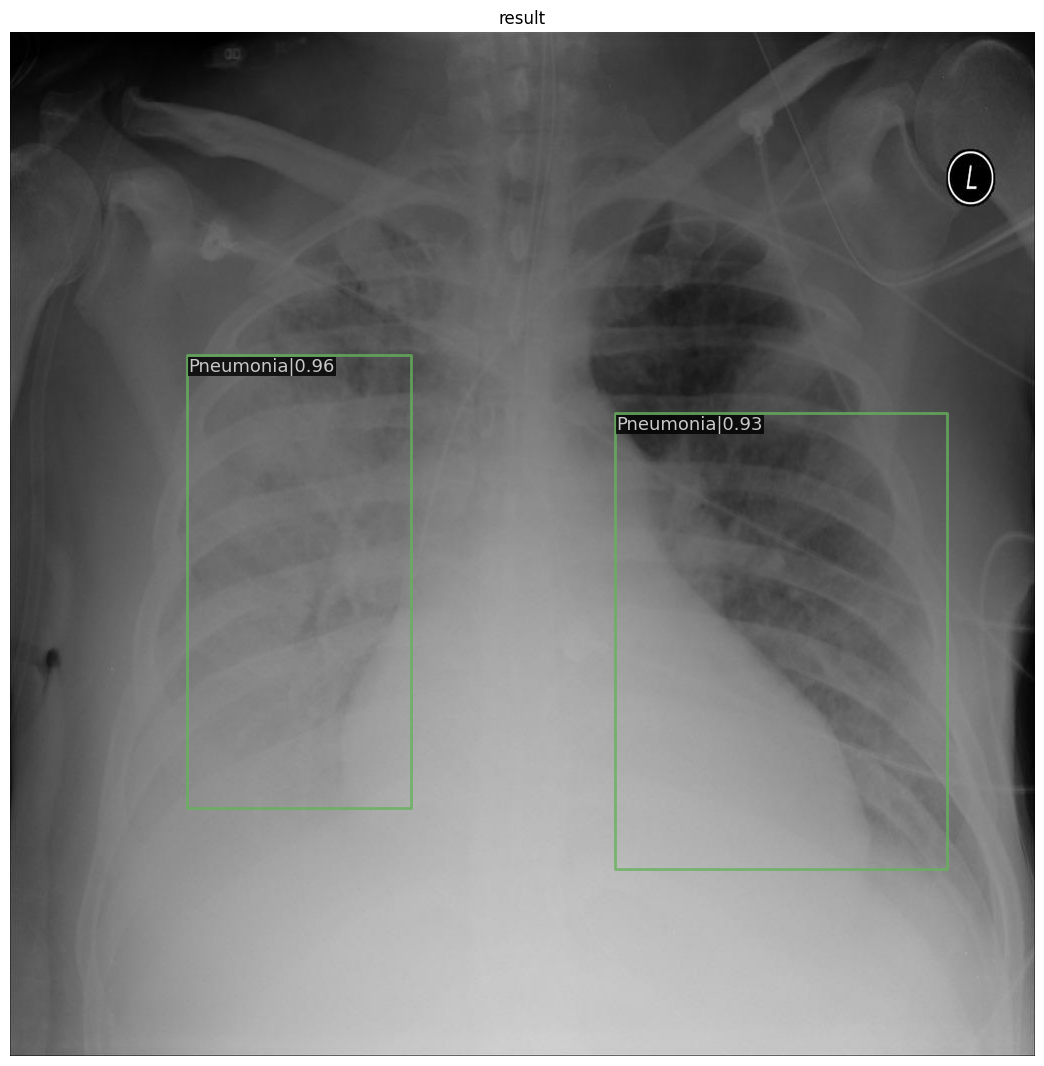

In [110]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# BGR Image 사용
img = cv2.imread('/content/rsna_data/train/02002619-3dea-4038-8d4d-458db30ed8de.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 변환

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)

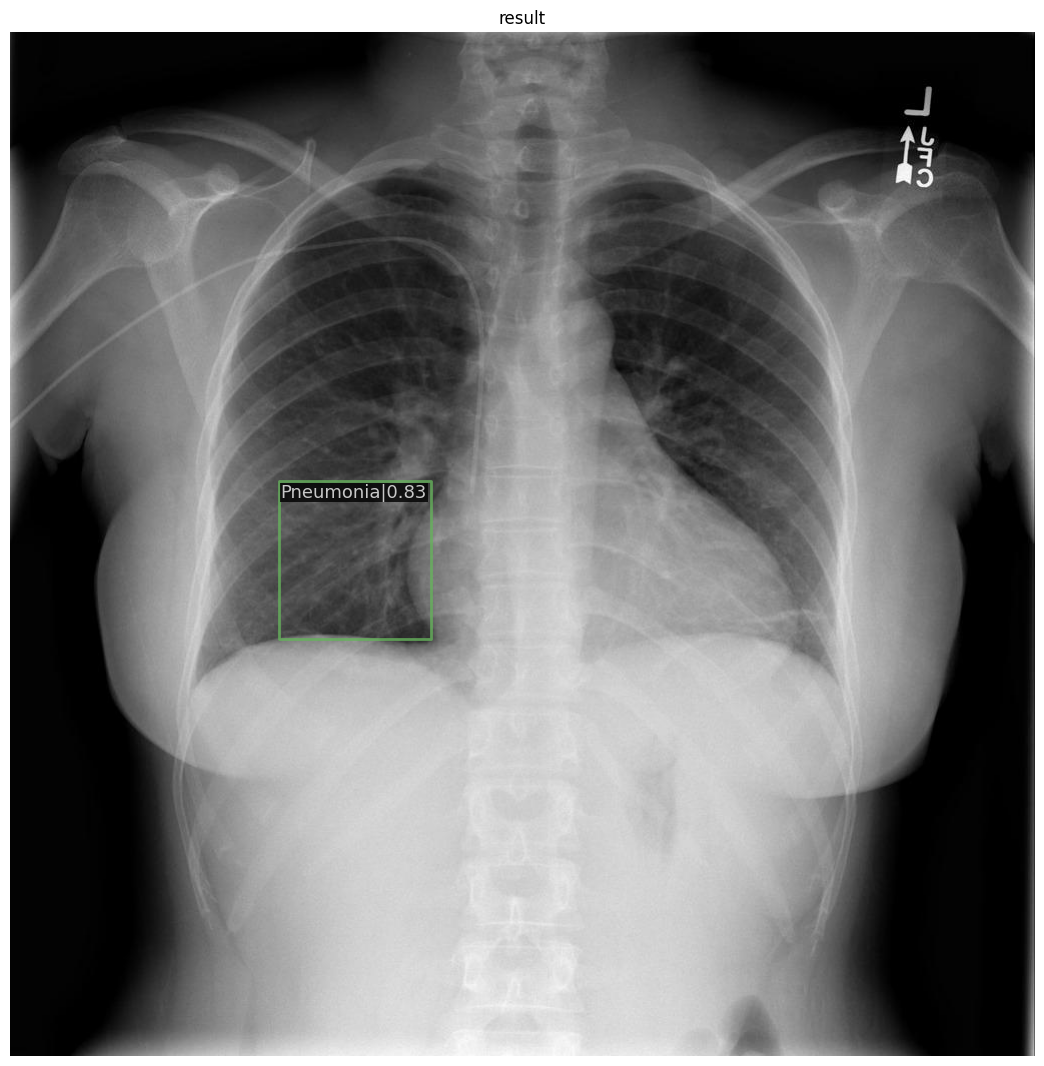

In [112]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# BGR Image 사용
img = cv2.imread('/content/rsna_data/test/0100515c-5204-4f31-98e0-f35e4b00004a.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 변환

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)